In [1]:
# Final Project for CS677
# Author: @PeiqiTan
# Dataset from UCI's Machine Learning Library

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from datetime import datetime
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("online_shoppers_intention.csv")

### Dataset Descriptions

In [2]:
df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [3]:
# df.head()

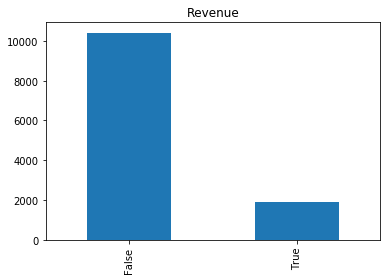

False    10422
True      1908
Name: Revenue, dtype: int64


In [4]:
# Set revenue as labels 
df["Revenue"] = df["Revenue"].astype(str)
plt.title("Revenue")
df["Revenue"].value_counts().plot.bar()
plt.show()
print(df["Revenue"].value_counts())

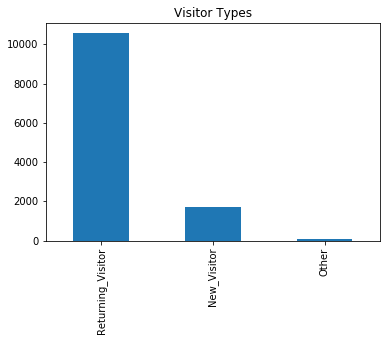

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64


In [5]:
df["VisitorType"].value_counts().plot.bar()
plt.title("Visitor Types")
plt.show()
print(df["VisitorType"].value_counts())

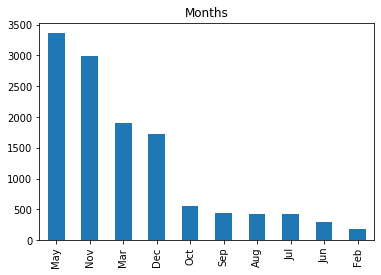

In [6]:
df["Month"] = df["Month"].astype(str).replace(regex={"June":"Jun"})
df["Month"].value_counts().plot.bar()
plt.title("Months")
plt.show()

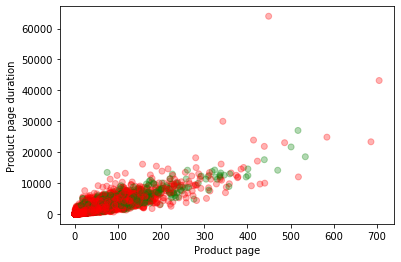

In [7]:
df["Color_label"] = df["Revenue"].map({"True":"green", "False":"red"})
plt.scatter(df["ProductRelated"], df["ProductRelated_Duration"], c=df["Color_label"],alpha=0.3)
plt.xlabel("Product page")
plt.ylabel("Product page duration")
plt.show()

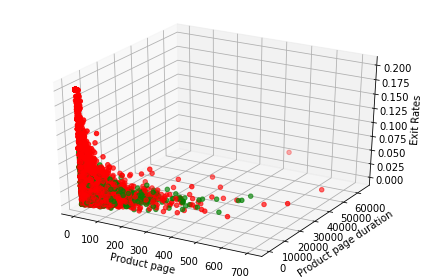

In [8]:
df["Color_label"] = df["Revenue"].map({"True":"green", "False":"red"})
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(df["ProductRelated"], df["ProductRelated_Duration"], df["ExitRates"], c=df["Color_label"])
ax.set_xlabel("Product page")
ax.set_ylabel("Product page duration")
ax.set_zlabel("Exit Rates")
plt.tight_layout()
plt.show()

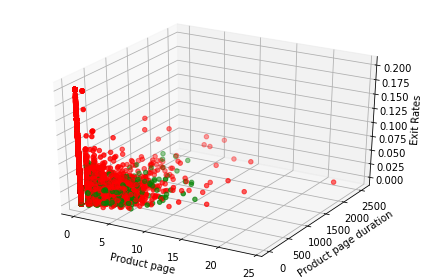

In [9]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(df["Informational"], df["Informational_Duration"], df["ExitRates"], c=df["Color_label"])
ax.set_xlabel("Product page")
ax.set_ylabel("Product page duration")
ax.set_zlabel("Exit Rates")
plt.tight_layout()
plt.show()

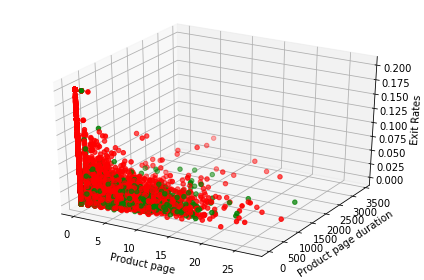

In [10]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(df["Administrative"], df["Administrative_Duration"], df["ExitRates"], c=df["Color_label"])
ax.set_xlabel("Product page")
ax.set_ylabel("Product page duration")
ax.set_zlabel("Exit Rates")
plt.tight_layout()
plt.show()

### Data

In [11]:
# formating data
df["VisitorType"] = df["VisitorType"].map({"Returning_Visitor":1, "New_Visitor":2, "Other":3})
df["Month"] = df["Month"].apply(lambda x: datetime.strptime(str(x),"%b").month)

# select features
columns = ["ProductRelated", "ProductRelated_Duration", "Informational", "Informational_Duration",\
          "Administrative", "Administrative_Duration", "ExitRates", "BounceRates", "Month", "Revenue"]
ml_df = df[columns]
# ml_df 

In [12]:
# data
features = ml_df.columns[:-1]
X = ml_df[features].values
Y = ml_df["Revenue"].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# base estimators: naive bayesian, decision tree
native_bayesian = GaussianNB()
decision_tree = tree.DecisionTreeClassifier(criterion="entropy", random_state=0, class_weight="balanced")

### Initial Tests

The accuracy score of Naive Bayesian Classifer:
 0.779 
The confusion matrix:
 [[1842  202]
 [ 342   80]] 
F1 score: 0.761


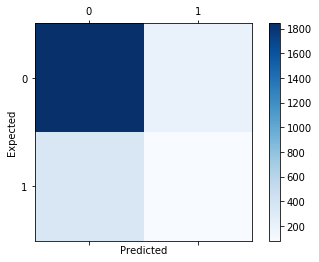


The accuracy score of Decision Tree Classifer:
 0.755 
The confusion matrix:
 [[1754  290]
 [ 315  107]] 
F1 score: 0.752


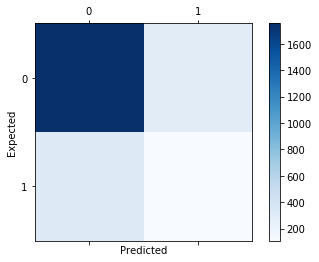

In [13]:
# Naive Bayesian
nbc = native_bayesian.fit(X_train, Y_train)
nbc_predict = nbc.predict(X_test)
nbc_acc = accuracy_score(Y_test, nbc_predict)
nbc_cf_matrix = confusion_matrix(Y_test, nbc_predict)
nbc_f = f1_score(Y_test, nbc_predict, average="weighted")
print("The accuracy score of Naive Bayesian Classifer:\n", round(nbc_acc,3),\
     "\nThe confusion matrix:\n", nbc_cf_matrix,\
     "\nF1 score:", round(nbc_f,3))

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(nbc_cf_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.show()

# Decision Tree
dtc = decision_tree.fit(X_train, Y_train)
dtc_predict = dtc.predict(X_test)
dtc_acc = accuracy_score(Y_test, dtc_predict)
dtc_cf_matrix = confusion_matrix(Y_test, dtc_predict)
dtc_f = f1_score(Y_test, dtc_predict, average="weighted")
print("\nThe accuracy score of Decision Tree Classifer:\n", round(dtc_acc,3),\
     "\nThe confusion matrix:\n", dtc_cf_matrix,\
     "\nF1 score:", round(dtc_f,3))

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dtc_cf_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.show()

### Adjustments

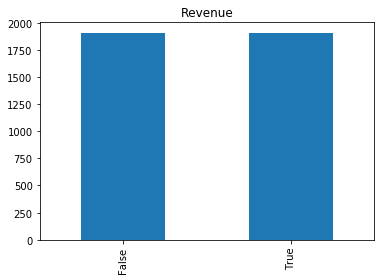

The accuracy score of Naive Bayesian Classifer:
 0.603 
The confusion matrix:
 [[770 220]
 [537 381]] 
F1 score: 0.589


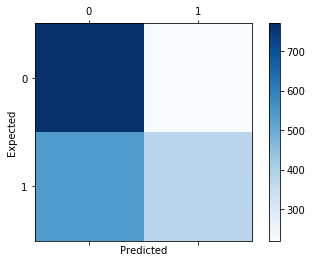


The accuracy score of Decision Tree Classifer:
 0.612 
The confusion matrix:
 [[603 387]
 [354 564]] 
F1 score: 0.612


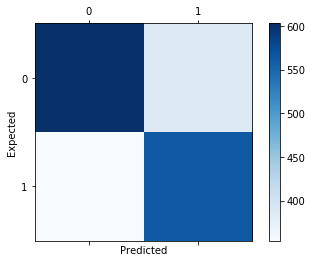

In [14]:
# Divide by class
df_class_false = df[df["Revenue"] == "False"].reset_index()
df_class_true = df[df["Revenue"] == "True"].reset_index()

# Count labels
rev_false, rev_true = df["Revenue"].value_counts()

# Random under sampling
df_false_under_sampling = df_class_false.sample(rev_true)
df_test_under = pd.concat([df_false_under_sampling, df_class_true], axis=0)

df_test_under["Revenue"].value_counts().plot.bar()
plt.title("Revenue")
plt.show()

# data
X_under = df_test_under[features].values
Y_under = df_test_under["Revenue"].values
x_train, x_test, y_train, y_test = train_test_split(X_under, Y_under, test_size=0.5, random_state=0)

# Naive Bayesian
nbc = native_bayesian.fit(x_train, y_train)
nbc_predict = nbc.predict(x_test)
nbc_acc = accuracy_score(y_test, nbc_predict)
nbc_cf_matrix = confusion_matrix(y_test, nbc_predict)
nbc_f = f1_score(y_test, nbc_predict, average="weighted")
print("The accuracy score of Naive Bayesian Classifer:\n", round(nbc_acc,3),\
     "\nThe confusion matrix:\n", nbc_cf_matrix,\
     "\nF1 score:", round(nbc_f,3))

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(nbc_cf_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.show()

# Decision Tree
dtc = decision_tree.fit(x_train, y_train)
dtc_predict = dtc.predict(x_test)
dtc_acc = accuracy_score(y_test, dtc_predict)
dtc_cf_matrix = confusion_matrix(y_test, dtc_predict)
dtc_f = f1_score(y_test, dtc_predict, average="weighted")
print("\nThe accuracy score of Decision Tree Classifer:\n", round(dtc_acc,3),\
     "\nThe confusion matrix:\n", dtc_cf_matrix,\
     "\nF1 score:", round(dtc_f,3))

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dtc_cf_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.show()


The accuracy score of Adaboost Classifer -- Naive Bayesian:
 0.471 
The confusion matrix:
 [[314 676]
 [334 584]] 
F1 score: 0.457


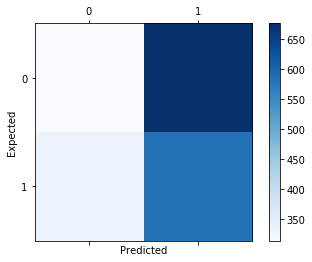


The accuracy score of Adaboost Classifer -- Decision Tree:
 0.616 
The confusion matrix:
 [[606 384]
 [349 569]] 
F1 score: 0.616


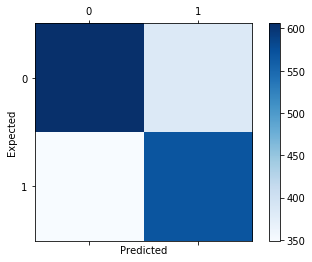


The accuracy score of Logistic regression:
 0.495 
The confusion matrix:
 [[392 598]
 [366 552]] 
F1 score: 0.49


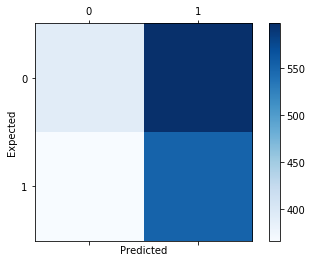


The accuracy score of SVM(rbf):
 0.515 
The confusion matrix:
 [[339 651]
 [274 644]] 
F1 score: 0.499


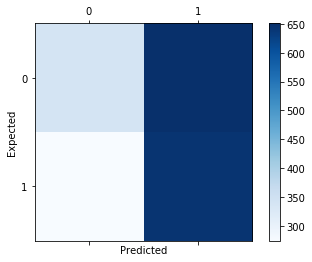

In [15]:
# Adaboost -- Native Bayesian
abc = AdaBoostClassifier(base_estimator=native_bayesian, n_estimators=50, learning_rate=1, random_state=0)
abc.fit(x_train, y_train)
abc_predict = abc.predict(x_test)
abc_acc = accuracy_score(y_test, abc_predict)
abc_cf_matrix = confusion_matrix(y_test, abc_predict)
abc_f1 = f1_score(y_test, abc_predict, average="weighted")
print("The accuracy score of Adaboost Classifer -- Naive Bayesian:\n", round(abc_acc,3),\
     "\nThe confusion matrix:\n", abc_cf_matrix,\
     "\nF1 score:", round(abc_f1,3))

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(abc_cf_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.show()

# Adaboost -- Decision Tree
abc = AdaBoostClassifier(base_estimator=decision_tree, n_estimators=50, learning_rate=1, random_state=0)
abc.fit(x_train, y_train)
abc_predict2 = abc.predict(x_test)
abc_acc2 = accuracy_score(y_test, abc_predict2)
abc_cf_matrix2 = confusion_matrix(y_test, abc_predict2)
abc_f2 = f1_score(y_test, abc_predict2, average="weighted")
print("\nThe accuracy score of Adaboost Classifer -- Decision Tree:\n", round(abc_acc2,3),\
     "\nThe confusion matrix:\n", abc_cf_matrix2,\
     "\nF1 score:", round(abc_f2,3))

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(abc_cf_matrix2, cmap=plt.cm.Blues)
fig.colorbar(cax)
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.show()

x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_train)

# logistic regression 
log_reg = LogisticRegression(class_weight="balanced")
log_reg.fit(x_train ,y_train)
log_predict = log_reg.predict(x_test)
log_acc = accuracy_score(y_test, log_predict)
log_cf_matrix = confusion_matrix(y_test, log_predict)
log_f = f1_score(y_test, log_predict, average="weighted")
print("\nThe accuracy score of Logistic regression:\n", round(log_acc,3),\
     "\nThe confusion matrix:\n", log_cf_matrix,\
     "\nF1 score:", round(log_f,3))

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(log_cf_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.show()

# svm
svm_classifier = svm.SVC(kernel="rbf").fit(x_train, y_train)
svm_predict= svm_classifier.predict(x_test)
svm_acc = svm_classifier.score(x_test, y_test)
svm_cf_matrix = confusion_matrix(y_test, svm_predict)
svm_f = f1_score(y_test, svm_predict, average="weighted")
print("\nThe accuracy score of SVM(rbf):\n", round(svm_acc,3),\
     "\nThe confusion matrix:\n", svm_cf_matrix,\
     "\nF1 score:", round(svm_f,3))

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(svm_cf_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.show()

In [16]:
f_scores = {"nbc_f":[nbc_f], "dtc_f":[dtc_f], "abc_f1":[abc_f1], "abc_f2":[abc_f2], "log_f":[log_f], "svm_f":[svm_f]}
f_table = pd.DataFrame(f_scores)
f_table

,nbc_f,dtc_f,abc_f1,abc_f2,log_f,svm_f
0,0.589228,0.611773,0.456949,0.615965,0.489571,0.499485


In [17]:
# feature importance
dt = decision_tree.fit(x_train, y_train)
importances = dt.feature_importances_
feature_importance = pd.DataFrame(importances, columns={"Importance"})
feature_importance.set_index(features, inplace=True)
table = feature_importance.sort_values(by="Importance", ascending=0)
table

,Importance
ExitRates,0.308798
ProductRelated_Duration,0.198265
ProductRelated,0.144155
Administrative_Duration,0.108834
BounceRates,0.065547
Month,0.065006
Administrative,0.058280
Informational_Duration,0.025912
Informational,0.025202


In [18]:
important_features = table.index[:4]
X = df_test_under[important_features].values
Y = df_test_under["Revenue"].values
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.5, random_state=0)


The accuracy score of Decision Tree Classifer:
 0.615 
The confusion matrix:
 [[590 400]
 [335 583]] 
F1 score: 0.615


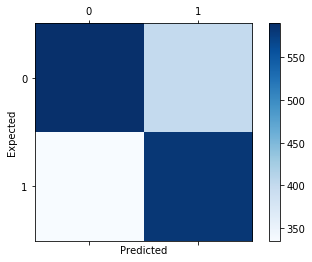

In [19]:
# Decision Tree
dtc2 = decision_tree.fit(x_train2, y_train2)
dtc_predict2 = dtc.predict(x_test2)
dtc_acc2 = accuracy_score(y_test2, dtc_predict2)
dtc_cf_matrix2 = confusion_matrix(y_test2, dtc_predict2)
dtc_f2 = f1_score(y_test2, dtc_predict2, average="weighted")
print("\nThe accuracy score of Decision Tree Classifer:\n", round(dtc_acc2,3),\
     "\nThe confusion matrix:\n", dtc_cf_matrix2,\
     "\nF1 score:", round(dtc_f2,3))

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dtc_cf_matrix2, cmap=plt.cm.Blues)
fig.colorbar(cax)
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.show()
